In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Cargar el conjunto de datos
file_path = 'fallos.csv' 
data = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')

# Renombrar la columna incorrectamente nombrada
data.rename(columns={'fecha_observacion,,,,' : 'fecha_observacion'}, inplace=True)

# Verificar los nombres de las columnas después del cambio
print(data.columns)

# Excluir columnas que no se usarán en el modelo
data_prepared = data.drop(columns=['fecha_fallo'])

# Identificar variables categóricas y numéricas
categorical_vars = data_prepared.select_dtypes(include=['object']).columns.tolist()
numerical_vars = data_prepared.select_dtypes(exclude=['object']).columns.tolist()
numerical_vars.remove('fallo')  # Excluir la variable objetivo

# Preprocesamiento: Estandarización de variables numéricas y codificación One-Hot para variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_vars),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_vars)
    ])

# Separar el conjunto de datos en características y variable objetivo
X = data_prepared.drop('fallo', axis=1)
y = data_prepared['fallo']


Index(['mcodes', 'terminal', 'estado_terminal', 'producto_red', 'tecnologiapp',
       'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter',
       'grupo_version', 'mcc', 'grupo_version_ant', 'ciudadfin',
       'trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos', 'trx_dia_tres',
       'trx_dia_cuatro', 'trx_dia_cinco', 'trx_dia_seis', 'trx_mes_tres',
       'trx_mes_dos', 'trx_mes_uno', 'prom_mes_tres', 'prom_mes_dos',
       'prom_mes_uno', 'total_terminales', 'cantidad_falla_m3',
       'cantidad_falla_m2', 'cantidad_falla_mes1',
       'antiguedad_creacion_terminal', 'antiguedad_version',
       'antiguedad_compra_pos', 'antiguedad_puesta_pos', 'clase_falla',
       'fallo', 'fecha_fallo', 'fecha_observacion'],
      dtype='object')


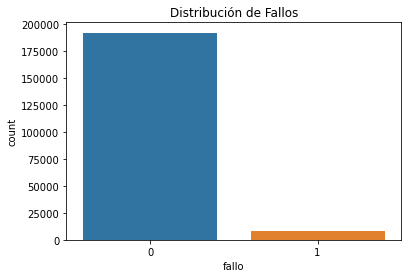

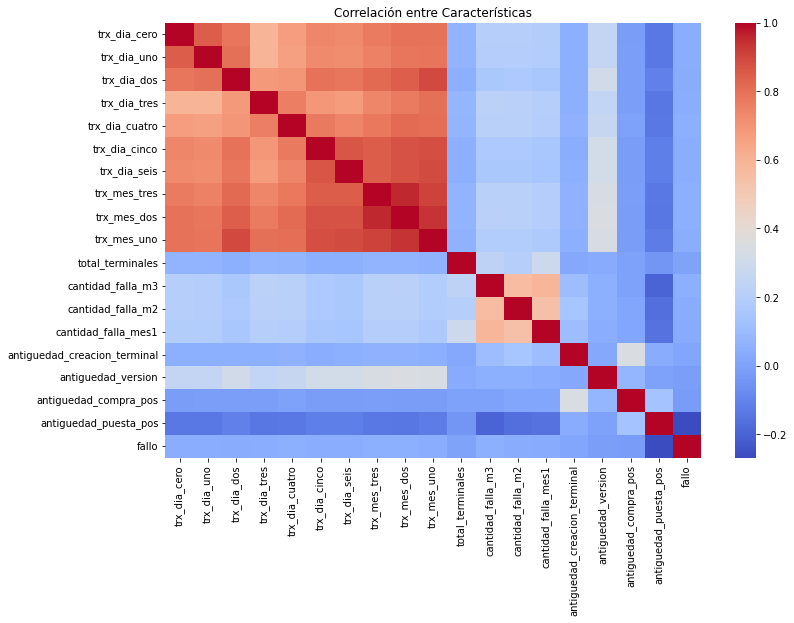

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de 'fallo'
sns.countplot(x='fallo', data=data)
plt.title('Distribución de Fallos')
plt.show()

# Correlaciones entre las características numéricas y 'fallo'
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlación entre Características')
plt.show()

In [3]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y configurar el modelo de regresión logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Crear el pipeline de preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', logistic_model)])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['trx_dia_cero',
                                                   'trx_dia_uno', 'trx_dia_dos',
                                                   'trx_dia_tres',
                                                   'trx_dia_cuatro',
                                                   'trx_dia_cinco',
                                                   'trx_dia_seis',
                                                   'trx_mes_tres',
                                                   'trx_mes_dos', 'trx_mes_uno',
                                                   'total_terminales',
                                                   'cantidad_falla_m3',
                                                   'cantidad_falla_m2',
                                                   'cantidad_falla_mes1',
                                    

In [4]:
# Evaluar el modelo
accuracy_train = pipeline.score(X_train, y_train)
accuracy_test = pipeline.score(X_test, y_test)

print(f'Precisión en el conjunto de entrenamiento: {accuracy_train}')
print(f'Precisión en el conjunto de prueba: {accuracy_test}')

Precisión en el conjunto de entrenamiento: 0.9865498318728985
Precisión en el conjunto de prueba: 0.965925


In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Calcular e imprimir otras métricas de evaluación (precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(class_report)


Matriz de confusión:
[[38326    74]
 [ 1289   311]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     38400
           1       0.81      0.19      0.31      1600

    accuracy                           0.97     40000
   macro avg       0.89      0.60      0.65     40000
weighted avg       0.96      0.97      0.96     40000



------------------------------------------------------------------------------------

In [6]:
import pandas as pd

# Asegurándonos de que las fechas están en formato datetime
data['fecha_fallo'] = pd.to_datetime(data['fecha_fallo'])


In [7]:
data.columns

Index(['mcodes', 'terminal', 'estado_terminal', 'producto_red', 'tecnologiapp',
       'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter',
       'grupo_version', 'mcc', 'grupo_version_ant', 'ciudadfin',
       'trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos', 'trx_dia_tres',
       'trx_dia_cuatro', 'trx_dia_cinco', 'trx_dia_seis', 'trx_mes_tres',
       'trx_mes_dos', 'trx_mes_uno', 'prom_mes_tres', 'prom_mes_dos',
       'prom_mes_uno', 'total_terminales', 'cantidad_falla_m3',
       'cantidad_falla_m2', 'cantidad_falla_mes1',
       'antiguedad_creacion_terminal', 'antiguedad_version',
       'antiguedad_compra_pos', 'antiguedad_puesta_pos', 'clase_falla',
       'fallo', 'fecha_fallo', 'fecha_observacion'],
      dtype='object')

In [8]:
data['fecha_observacion'] = pd.to_datetime(data['fecha_observacion'])

# Calculando la diferencia en días entre las fechas de fallo y observación
data['dias_hasta_fallo'] = (data['fecha_fallo'] - data['fecha_observacion']).dt.days

# Definiendo la variable objetivo para fallos en el rango de 7 a 37 días
data['fallo_T7_T37'] = data['dias_hasta_fallo'].apply(lambda x: 1 if 7 <= x <= 37 else 0)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)


In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split


#X = data.drop(['fallo', 'fallo_T7_T37', 'fecha_fallo', 'fecha_observacion', 'dias_hasta_fallo'], axis=1)  
y = data['fallo_T7_T37']

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(data.columns)

Index(['mcodes', 'terminal', 'estado_terminal', 'producto_red', 'tecnologiapp',
       'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter',
       'grupo_version', 'mcc', 'grupo_version_ant', 'ciudadfin',
       'trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos', 'trx_dia_tres',
       'trx_dia_cuatro', 'trx_dia_cinco', 'trx_dia_seis', 'trx_mes_tres',
       'trx_mes_dos', 'trx_mes_uno', 'prom_mes_tres', 'prom_mes_dos',
       'prom_mes_uno', 'total_terminales', 'cantidad_falla_m3',
       'cantidad_falla_m2', 'cantidad_falla_mes1',
       'antiguedad_creacion_terminal', 'antiguedad_version',
       'antiguedad_compra_pos', 'antiguedad_puesta_pos', 'clase_falla',
       'fallo', 'fecha_fallo', 'fecha_observacion', 'dias_hasta_fallo',
       'fallo_T7_T37'],
      dtype='object')


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

categorical_features = ['mcodes', 'terminal', 'estado_terminal', 'producto_red', 'tecnologiapp',
                        'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter',
                        'grupo_version', 'mcc', 'grupo_version_ant', 'ciudadfin',
                        'prom_mes_tres', 'prom_mes_dos', 'prom_mes_uno', 'clase_falla', 
                        'fecha_observacion'] 

numeric_features = ['trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos', 'trx_dia_tres', 'trx_dia_cuatro',
                    'trx_dia_cinco', 'trx_dia_seis', 'trx_mes_tres', 'trx_mes_dos', 'trx_mes_uno',
                    'total_terminales', 'cantidad_falla_m3', 'cantidad_falla_m2', 'cantidad_falla_mes1',
                    'antiguedad_creacion_terminal']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])


In [13]:
X_train.columns

Index(['mcodes', 'terminal', 'estado_terminal', 'producto_red', 'tecnologiapp',
       'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter',
       'grupo_version', 'mcc', 'grupo_version_ant', 'ciudadfin',
       'trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos', 'trx_dia_tres',
       'trx_dia_cuatro', 'trx_dia_cinco', 'trx_dia_seis', 'trx_mes_tres',
       'trx_mes_dos', 'trx_mes_uno', 'prom_mes_tres', 'prom_mes_dos',
       'prom_mes_uno', 'total_terminales', 'cantidad_falla_m3',
       'cantidad_falla_m2', 'cantidad_falla_mes1',
       'antiguedad_creacion_terminal', 'antiguedad_version',
       'antiguedad_compra_pos', 'antiguedad_puesta_pos', 'clase_falla',
       'fecha_observacion'],
      dtype='object')

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

#X = data.drop(['fallo', 'fallo_T7_T37', 'fecha_fallo', 'fecha_observacion', 'dias_hasta_fallo'], axis=1)  
y = data['fallo_T7_T37']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Utilizar el mismo pipeline definido anteriormente para preprocesamiento y el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['trx_dia_cero',
                                                   'trx_dia_uno', 'trx_dia_dos',
                                                   'trx_dia_tres',
                                                   'trx_dia_cuatro',
                                                   'trx_dia_cinco',
                                                   'trx_dia_seis',
                                                   'trx_mes_tres',
                                                   'trx_mes_dos', 'trx_mes_uno',
                                                   'total_terminales',
                                                   'cantidad_falla_m3',
                                                   'cantidad_falla_m2',
                                                   'cantidad_falla_mes1',
                                    

In [16]:
# Utilizar el mismo pipeline definido anteriormente para preprocesamiento y el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['trx_dia_cero',
                                                   'trx_dia_uno', 'trx_dia_dos',
                                                   'trx_dia_tres',
                                                   'trx_dia_cuatro',
                                                   'trx_dia_cinco',
                                                   'trx_dia_seis',
                                                   'trx_mes_tres',
                                                   'trx_mes_dos', 'trx_mes_uno',
                                                   'total_terminales',
                                                   'cantidad_falla_m3',
                                                   'cantidad_falla_m2',
                                                   'cantidad_falla_mes1',
                                    

In [17]:
# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

In [18]:
# Evaluación del modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Matriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)
print("\nPrecisión del modelo:", accuracy)

Matriz de Confusión:
 [[38875     2]
 [ 1104    19]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     38877
           1       0.90      0.02      0.03      1123

    accuracy                           0.97     40000
   macro avg       0.94      0.51      0.51     40000
weighted avg       0.97      0.97      0.96     40000


Precisión del modelo: 0.97235


In [24]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = data.drop(['fallo', 'fallo_T7_T37', 'fecha_fallo', 'dias_hasta_fallo'], axis=1)
y = data['fallo_T7_T37']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Definir el preprocesamiento para variables numéricas y categóricas
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Crear el pipeline con SMOTE y LogisticRegression
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [29]:
# Entrenar el modelo
pipeline.fit(X_train, y_train)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['trx_dia_cero', 'trx_dia_uno', 'trx_dia_dos', 'trx_dia_tres',
       'trx_dia_cuatro', 'trx_dia_cinco', 'trx_dia_seis', 'trx_mes_tres',
       'trx_mes_dos', 'trx_mes_uno', 'total_terminales', 'cantidad_falla_m3',
       'cantidad_falla_m2', 'cantidad_falla_mes1',
       'antiguedad_creacion_term...
                                                  Index(['mcodes', 'terminal', 'estado_terminal', 'producto_red', 'tecnologiapp',
       'modelopp', 'tecnologiaaf', 'modeloaf', 'browser', 'nombretipoter',
       'grupo_version', 'mcc', 'grupo_version_ant', 'ciudadfin',
       'prom_mes_tres', 'prom_mes_dos', 'prom_mes_uno', 'clase_falla'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [30]:
# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37863  1014]
 [  372   751]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     38877
           1       0.43      0.67      0.52      1123

    accuracy                           0.97     40000
   macro avg       0.71      0.82      0.75     40000
weighted avg       0.97      0.97      0.97     40000

